In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics.cluster import completeness_score
from sklearn.decomposition import PCA

In [8]:

admissionsData = pd.read_csv('data/AdmissionData.csv')
songData = pd.read_csv('data/SongData.csv')
admissionsData.keys()





Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
admissionsData = pd.read_csv('data/AdmissionData.csv')
arr = admissionsData['Chance of Admit '] >= 0.725
targetAdmissions = []
for result in arr:
    if result:
        targetAdmissions.append(1)
    else:
        targetAdmissions.append(0)
admissionsFeatures = ['GRE Score', 'University Rating', 'CGPA' ]
admissionsData1 = admissionsData[admissionsFeatures]
songData.keys()



Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'Unnamed: 15'],
      dtype='object')

In [10]:
songData = pd.read_csv('data/SongData.csv')
targetSong = songData['target']
songFeatures = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'valence', 'loudness', 'speechiness', 'tempo']
songData1 = songData[songFeatures]







# K-Means Clustering

In [73]:
kmeans = KMeans(n_clusters = 2)
kmodel = kmeans.fit(admissionsData1)

Text(0.5, 1.0, 'K-Means Classification')

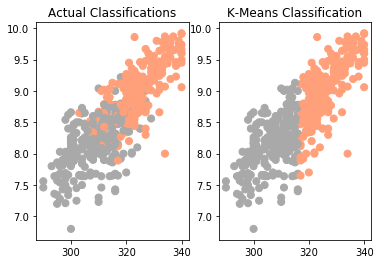

In [74]:
dataF = pd.DataFrame(admissionsData1)
dataF.columns= ['GRE Score', 'University Rating', 'CGPA' ]
y = pd.DataFrame(targetAdmissions)
y.columns = ['Targets']

color_theme = np.array(['darkgray', 'lightsalmon'])
plt.subplot(1,2,1)
plt.scatter(x=dataF['GRE Score'], y=dataF['CGPA'], c=color_theme[targetAdmissions], s=50)
plt.title("Actual Classifications")


plt.subplot(1,2,2)
plt.scatter(x=dataF['GRE Score'], y=dataF['CGPA'], c=color_theme[kmodel.labels_], s=50)
plt.title("K-Means Classification")


In [75]:
kmeans = KMeans(n_clusters = 2)
kmodel = kmeans.fit(songData1)

Text(0.5, 1.0, 'K-Means Classification')

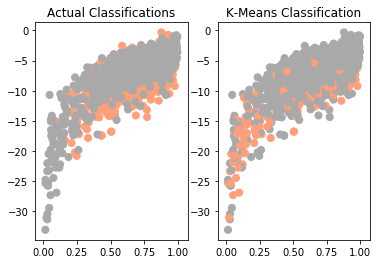

In [84]:
dataF = pd.DataFrame(songData1)
dataF.columns= ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'valence', 'loudness', 'speechiness', 'tempo']
y = pd.DataFrame(targetSong)
y.columns = ['Targets']

color_theme = np.array(['darkgray', 'lightsalmon'])
plt.subplot(1,2,1)
plt.scatter(x=dataF['energy'], y=dataF['loudness'], c=color_theme[targetSong], s=50)
plt.title("Actual Classifications")

color_theme = np.array([ 'lightsalmon', 'darkgray'])
plt.subplot(1,2,2)
plt.scatter(x=dataF['energy'], y=dataF['loudness'], c=color_theme[kmodel.labels_], s=50)
plt.title("K-Means Classification")

In [136]:
kmeans = KMeans(n_clusters = 2)
kmodel = kmeans.fit(songData1)
print ("classification report for song Data")
print (classification_report(targetSong, kmodel.labels_) )
print ("classification report for college admissions")
kmodel1 = kmeans.fit(admissionsData1)
print (classification_report(targetAdmissions, kmodel1.labels_))


classification report for song Data
              precision    recall  f1-score   support

           0       0.53      0.92      0.67       997
           1       0.72      0.20      0.32      1020

   micro avg       0.56      0.56      0.56      2017
   macro avg       0.63      0.56      0.50      2017
weighted avg       0.63      0.56      0.49      2017

classification report for college admissions
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       252
           1       0.83      0.85      0.84       248

   micro avg       0.84      0.84      0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [86]:
def getMeanSquaredDistances(clustersArray, dataSet):
    squaredSum = 0
    index = 0
    allEuclideanDistances = []
    for i in range(len(dataSet)):
        array = []
        for key in dataSet.keys():
            array.append(dataSet[key][i])
        smallest = 0
        for ii in range (0, len(clustersArray)):
            center = clustersArray[ii]
            sum = 0
            for iii in range(len(center)):
                sum += ((center[iii] - array[iii]) ** 2)
            if sum < smallest or smallest == 0:
                smallest = sum ** 0.5
        allEuclideanDistances.append(smallest)
    return allEuclideanDistances
            
            
        
    

In [89]:
#arr = getMeanSquaredDistances(kmodel.cluster_centers_, songData1)
#first songData
x = []
y = []
for i in range (2, 500):
    x.append(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(songData1)
    arr = getMeanSquaredDistances(kmodel.cluster_centers_, songData1)
    y.append(sum(arr)/len(arr))
    print (i)
y
    


TypeError: 'numpy.float64' object is not callable

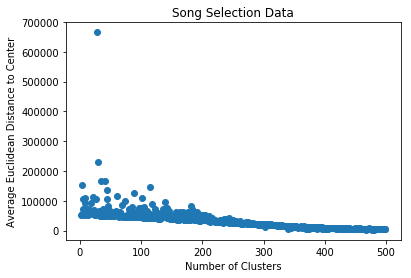

In [151]:
plt.scatter(x,y)
plt.title("Song Selection Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Euclidean Distance to Center")
plt.show()

In [145]:
x = []
y = []
for i in range (2, 30):
    x.append(i)
    kmeans1 = KMeans(n_clusters = i)
    print (i)
    kmodel11 = kmeans1.fit(admissionsData1)
    arr = getMeanSquaredDistances(kmodel11.cluster_centers_, admissionsData1)
    y.append(sum(arr)/len(arr))
y
    

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


[9.333937695242138,
 6.168942791992376,
 5.022373043257052,
 2.564014235154322,
 2.7273324283579394,
 2.375557529964205,
 1.979204780217922,
 1.814836961610622,
 1.7008360444929809,
 1.582343945182798,
 1.473744368459818,
 1.370683445963234,
 1.275592428351478,
 1.2655657118775867,
 1.159187532351852,
 1.1444803403558599,
 1.1263024635008447,
 1.0755782506964915,
 1.0458032163370652,
 1.036087420928408,
 0.9971851035174368,
 0.9877768721629754,
 0.9684433550079297,
 0.9478619087642423,
 0.9322837736976549,
 0.891587068205916,
 0.8801521278830761,
 0.8616294837868035]

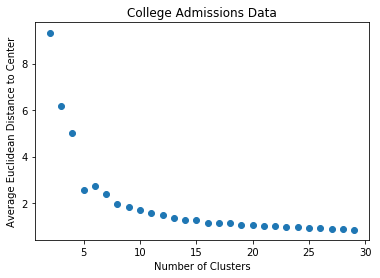

In [147]:
plt.scatter(x,y)
plt.title("College Admissions Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Euclidean Distance to Center")
plt.show()

# Expectation Maximization

In [152]:
from sklearn.mixture import GaussianMixture

In [168]:
x = []
y = []
for i in range(2, 100):
    x.append(i)
    print (i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(songData1)
    y.append(model2.score(songData1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


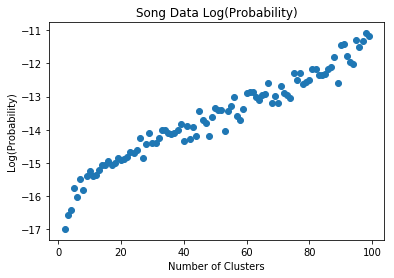

In [169]:
plt.scatter(x,y)
plt.title("Song Data Log(Probability)")
plt.xlabel("Number of Clusters")
plt.ylabel("Log(Probability)")
plt.show()

In [170]:
x = []
y = []
for i in range(2, 100):
    x.append(i)
    print (i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(songData1)
    y.append(model2.aic(songData1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


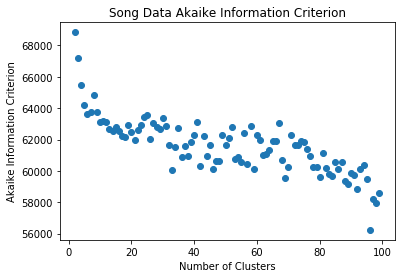

In [171]:
plt.scatter(x,y)
plt.title("Song Data Akaike Information Criterion")
plt.xlabel("Number of Clusters")
plt.ylabel("Akaike Information Criterion")
plt.show()

In [174]:
x = []
y = []
for i in range(2, 200):
    x.append(i)
    print (i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(songData1)
    y.append(model2.bic(songData1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


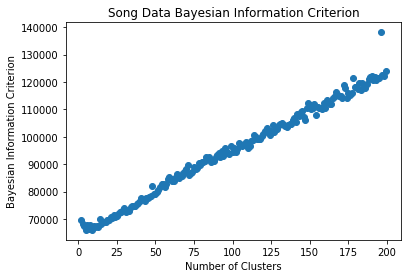

In [175]:
plt.scatter(x,y)
plt.title("Song Data Bayesian Information Criterion")
plt.xlabel("Number of Clusters")
plt.ylabel("Bayesian Information Criterion")
plt.show()

In [180]:
x = []
y = []
for i in range(2, 300):
    x.append(i)
    print (i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(admissionsData1)
    y.append(model2.score(admissionsData1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

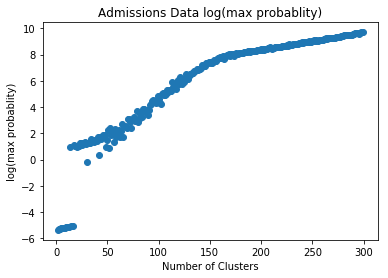

In [181]:
plt.scatter(x,y)
plt.title("Admissions Data log(max probablity)")
plt.xlabel("Number of Clusters")
plt.ylabel("log(max probablity)")
plt.show()

In [182]:
x = []
y = []
for i in range(2, 300):
    x.append(i)
    print (i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(admissionsData1)
    y.append(model2.aic(admissionsData1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

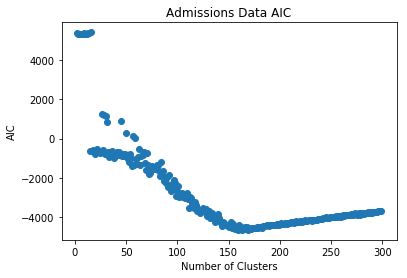

In [183]:
plt.scatter(x,y)
plt.title("Admissions Data AIC")
plt.xlabel("Number of Clusters")
plt.ylabel("AIC")
plt.show()

In [184]:
x = []
y = []
for i in range(2, 300):
    x.append(i)
    print (i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(admissionsData1)
    y.append(model2.bic(admissionsData1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

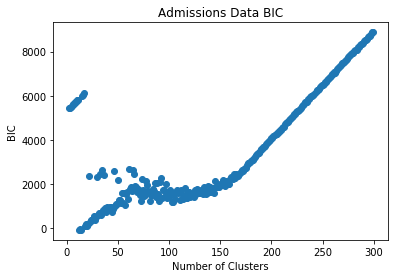

In [185]:
plt.scatter(x,y)
plt.title("Admissions Data BIC")
plt.xlabel("Number of Clusters")
plt.ylabel("BIC")
plt.show()

# PCA

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


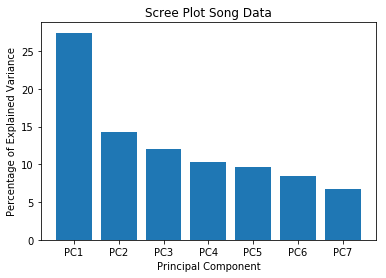

In [6]:
songData = pd.read_csv('data/SongData.csv')

songFeatures = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'valence', 'loudness', 'speechiness', 'tempo']
songData1 = songData[songFeatures]
songDataPCA = songData1
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaled_songPCA = preprocessing.scale(songDataPCA)
pca = PCA(n_components=7)
pca.fit(scaled_songPCA)
pca_song_data = pca.transform(scaled_songPCA)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=4)
labels = ['PC' + str(x) for x in range (1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+ 1), height = per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot Song Data")
plt.show()


In [43]:
pca.components_[4]

array([-0.09811109,  0.11549095,  0.22518888,  0.06403328,  0.21201826,
       -0.83879044,  0.00194573, -0.02455042,  0.36265912,  0.20390309])

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


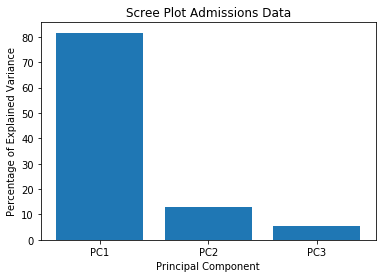

In [202]:
scaled_songPCA = preprocessing.scale(admissionsData1)
pca = PCA(n_components=3)
pca.fit(scaled_songPCA)
pca_song_data = pca.transform(scaled_songPCA)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+ 1), height = per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot Admissions Data")
plt.show()

In [119]:
x = []
y = []
for i in range (2, 30):
    x.append(i)
    kmeans1 = KMeans(n_clusters = i)
    print (i)
    kmodel11 = kmeans1.fit(pca_song_data)
    arr = getMeanSquaredDistances1(kmodel11.cluster_centers_, pca_song_data)
    y.append(sum(arr)/len(arr))
y

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


[1.0441800527724263,
 0.8666371689703654,
 0.7968785310816661,
 0.7267348603637437,
 0.6669329524417088,
 0.6356794802185304,
 0.6131193317421425,
 0.587089432784652,
 0.5535233635693335,
 0.5406426864258472,
 0.5156447184181228,
 0.4958402609106309,
 0.4747302793878644,
 0.4604746877820961,
 0.4511504576478042,
 0.4363417247861641,
 0.42556741497724215,
 0.4122031755040195,
 0.39764953802386854,
 0.4011869414214393,
 0.3810487656147667,
 0.3775166077114517,
 0.3690841538480079,
 0.36464957229568457,
 0.3546858692903324,
 0.34613604080844596,
 0.34182618141732213,
 0.33059617083330806]

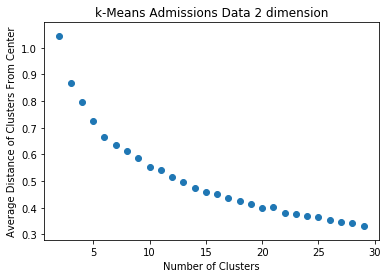

In [120]:
plt.scatter(x,y)
plt.title("k-Means Admissions Data 2 dimension")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

array([ 0.17872171, -1.58661566, -1.20682896])

array([[-0.33425239, -0.87132278, -1.71646674],
       [ 1.00877727, -0.73356922, -0.19047423],
       [ 0.17872171, -1.58661566, -1.20682896],
       ...,
       [-1.84201742,  0.81197746, -0.61313734],
       [-1.47646743,  1.39167597,  0.51606383],
       [-1.42376134,  2.1893075 , -0.69021203]])

array([[-4.26728512e-01,  4.57283502e-04,  5.89476271e-02],
       [ 3.94236493e+00, -4.22464961e-03, -5.44592291e-01]])

In [73]:
def getMeanSquaredDistances1(clustersArray, dataSet):
    squaredSum = 0
    index = 0
    allEuclideanDistances = []
    for i in range(0, len(pca_song_data)):
        currentData = pca_song_data[i]
        smallest = 0
        for centerIndex in range(0, len(clustersArray)):
            currentCenter = clustersArray[centerIndex]
            sum = 0
            for centerPoint in range(0, len(currentCenter)):
                sum += ((currentCenter[centerPoint] - currentData[centerPoint])**2)
            if sum < smallest or smallest == 0:
                smallest = sum
        allEuclideanDistances.append(smallest ** 0.5)
    return allEuclideanDistances

In [129]:
from sklearn.mixture import GaussianMixture
x = []
y = []
for i in range(2, 300):
    x.append(i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(pca_song_data)
    y.append(model2.score(pca_song_data))

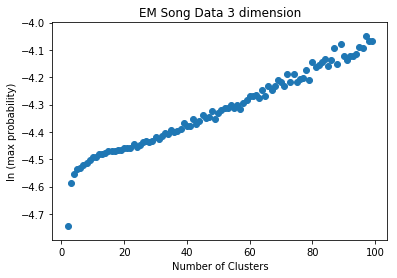

In [124]:
plt.scatter(x,y)
plt.title("EM Song Data 3 dimension")
plt.xlabel("Number of Clusters")
plt.ylabel("ln (max probability)")
plt.show()

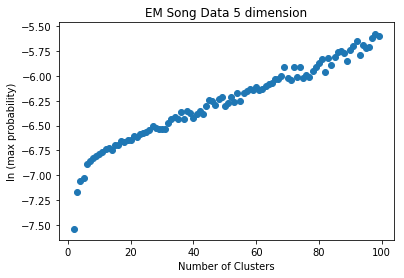

In [127]:
plt.scatter(x,y)
plt.title("EM Song Data 5 dimension")
plt.xlabel("Number of Clusters")
plt.ylabel("ln (max probability)")
plt.show()

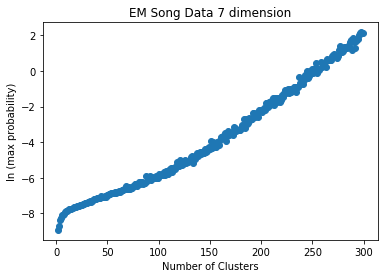

In [130]:
plt.scatter(x,y)
plt.title("EM Song Data 7 dimension")
plt.xlabel("Number of Clusters")
plt.ylabel("ln (max probability)")
plt.show()

In [171]:
from sklearn.mixture import GaussianMixture
x = []
y = []
for i in range(2, 30):
    x.append(i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(pca_song_data)
    y.append(model2.score(pca_song_data))

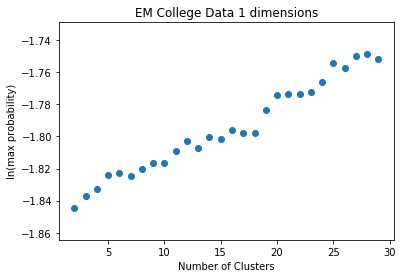

In [172]:
plt.scatter(x,y)
plt.title("EM College Data 1 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("ln(max probability)")
plt.show()

In [191]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
train, test = train_test_split(pca_song_data, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 1 dimension admissions data:" )
print(score)

For 1 dimension admissions data:
0.4533333333333333


In [193]:
train, test = train_test_split(pca_song_data, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 2 dimension admissions data:" )
print(score)

For 2 dimension admissions data:
0.5866666666666667


In [208]:
train, test = train_test_split(pca_song_data, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 3 dimension admissions data:" )
print(score)

For 3 dimension admissions data:
0.52


In [242]:
train, test = train_test_split(pca_song_data, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=13, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 3 dimension song data:" )
print(score)

For 3 dimension song data:
0.4884488448844885


In [250]:
train, test = train_test_split(pca_song_data, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=13, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 5 dimension song data:" )
print(score)

For 5 dimension song data:
0.5478547854785478


In [256]:
train, test = train_test_split(pca_song_data, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=13, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 7 dimension song data:" )
print(score)

For 7 dimension song data:
0.5346534653465347


In [71]:
from sklearn.decomposition import FastICA

kurtosises = []
for components in range(3,4):
    print (components)
    scaled_admissionsICA = preprocessing.scale(admissionsData1.T)
    ica = FastICA(n_components=components)
    transformed = ica.fit_transform(scaled_admissionsICA)
    
    #calculate kurtosis
    sample_size = len(transformed)
    
    means = []
    for i in range (0, len(transformed[0])):
        sum = 0
        for j in range(0, len(transformed)):
            sum += transformed[j][i]
        means.append(sum / sample_size)
    
    variances = []
    s3s = []
    s4s = []
    stds = []
    sumOfSquaresArr = []
    for i in range (0, len(transformed[0])):
        variance = 0
        s3 = 0
        s4 = 0
        for j in range (0, len(transformed)):
            variance += ((transformed[j][i] - means[i]) ** 2)
            s3 += ((transformed[j][i] - means[i]) ** 3)
            s4 += ((transformed[j][i] - means[i]) ** 4)
        sumOfSquaresArr.append(variance)
        newVariance = variance / sample_size
        variances.append(newVariance)
        stds.append(newVariance ** 0.5)
        s3s.append(s3 / sample_size)
        s4s.append(s4 / sample_size)
    
    sampleKurtosises = []
    for i in range(0, len(variances)):
        n = sample_size
        s4 = s4s[i]
        s2 = sumOfSquaresArr[i]
        sampleK = ((((n *(n + 1))/((n - 1) * (n - 2) * (n - 3))) * ((n-1)**2)) * (s4 /((s2) ** 2))) - 3
        sampleKurtosises.append(sampleK)
        
    kurtosises.append(sampleKurtosises)
        


    


3


ZeroDivisionError: division by zero

In [70]:
kurtosises

[]

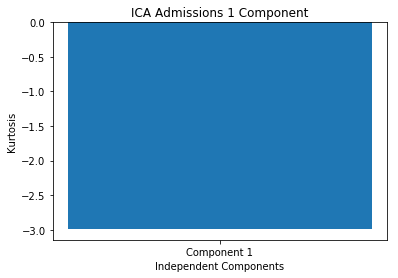

In [46]:
labels=['Component 1']
plt.bar(x=range(1, len(kurtosises[0])+ 1), height = kurtosises[0], tick_label=labels)
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title("ICA Admissions 1 Component")
plt.show()

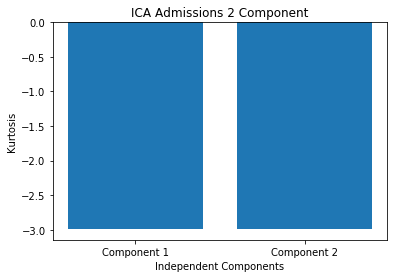

In [48]:
labels=['Component 1', 'Component 2']
plt.bar(x=range(1, len(kurtosises[1])+ 1), height = kurtosises[1], tick_label=labels)
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title("ICA Admissions 2 Component")
plt.show()

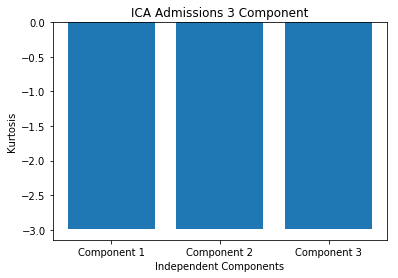

In [49]:
labels=['Component 1', 'Component 2', 'Component 3']
plt.bar(x=range(1, len(kurtosises[2])+ 1), height = kurtosises[2], tick_label=labels)
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title("ICA Admissions 3 Component")
plt.show()

In [61]:
kurtosises = []
for components in [3, 5, 7]:
    scaled_admissionsICA = preprocessing.scale(songData1)
    ica = FastICA(n_components=components)
    transformed = ica.fit_transform(scaled_admissionsICA)
    
    #calculate kurtosis
    sample_size = len(transformed)
    
    means = []
    for i in range (0, len(transformed[0])):
        sum = 0
        for j in range(0, len(transformed)):
            sum += transformed[j][i]
        means.append(sum / sample_size)
    
    variances = []
    s3s = []
    s4s = []
    stds = []
    sumOfSquaresArr = []
    for i in range (0, len(transformed[0])):
        variance = 0
        s3 = 0
        s4 = 0
        for j in range (0, len(transformed)):
            variance += ((transformed[j][i] - means[i]) ** 2)
            s3 += ((transformed[j][i] - means[i]) ** 3)
            s4 += ((transformed[j][i] - means[i]) ** 4)
        sumOfSquaresArr.append(variance)
        newVariance = variance / sample_size
        variances.append(newVariance)
        stds.append(newVariance ** 0.5)
        s3s.append(s3 / sample_size)
        s4s.append(s4 / sample_size)
    
    sampleKurtosises = []
    for i in range(0, len(variances)):
        n = sample_size
        s4 = s4s[i]
        s2 = sumOfSquaresArr[i]
        sampleK = ((((n *(n + 1))/((n - 1) * (n - 2) * (n - 3))) * ((n-1)**2)) * (s4 /((s2) ** 2))) - 3
        sampleKurtosises.append(sampleK)
        
    kurtosises.append(sampleKurtosises)
        


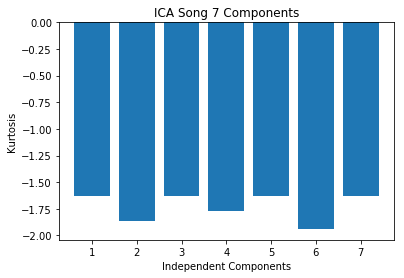

In [66]:
labels=['1', '2', '3', '4', '5', '6', '7']
plt.bar(x=range(1, len(kurtosises[2])+ 1), height = kurtosises[2], tick_label=labels)
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title("ICA Song 7 Components")
plt.show()

In [143]:
#songData1

In [138]:
scaled_admissionsICA = preprocessing.scale(songData1)
ica = FastICA(n_components=3)
transformed = ica.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 40):
    x.append(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transformed)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transformed)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


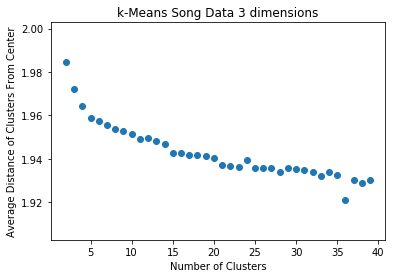

In [139]:
plt.scatter(x,y)
plt.title("k-Means Song Data 3 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

In [131]:
scaled_admissionsICA = preprocessing.scale(songData1)
ica = FastICA(n_components=5)
transformed = ica.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 70):
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transformed)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transformed)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))
    print (i)
y

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


[2.4633718776010345,
 2.4546291892857237,
 2.4503240019050816,
 2.4466525090578743,
 2.4433720417087885,
 2.44159481473101,
 2.4398003525581884,
 2.438890500236107,
 2.438088907880982,
 2.4371693279010387,
 2.436313016225559,
 2.435624963626757,
 2.433589137355337,
 2.434010939866609,
 2.4320994648051686,
 2.4317473096400946,
 2.431645055134333,
 2.431642313651851,
 2.429655710911837,
 2.4296538498502542,
 2.4297741106056105,
 2.428138730646728,
 2.427721501189561,
 2.428060503661319,
 2.4268358850312035,
 2.4267660681225474,
 2.4259398333409483,
 2.4262198382374494,
 2.4257514487669054,
 2.424946954919966,
 2.4252790520774554,
 2.425811809078757,
 2.4241079304676973,
 2.4243787603947853,
 2.4243132746898475,
 2.4233592240370934,
 2.423919169287633,
 2.4236303963964416,
 2.415903140578754,
 2.422857862325131,
 2.4219642967269337,
 2.4220791519657405,
 2.4235158289845984,
 2.4216782121833282,
 2.421988486746489,
 2.421462089163058,
 2.420521728696076,
 2.4223539802269243,
 2.42156712262

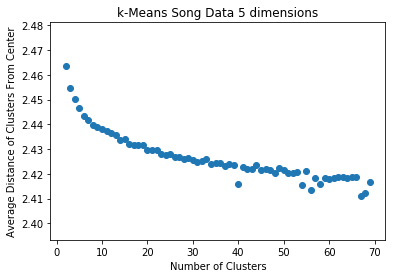

In [133]:
x = range(2, 70)
plt.scatter(x,y)
plt.title("k-Means Song Data 5 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

In [141]:
scaled_admissionsICA = preprocessing.scale(songData1)
ica = FastICA(n_components=7)
transformed = ica.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 50):
    x.append(i)
    #print(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transformed)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transformed)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))
    #print (i)


/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


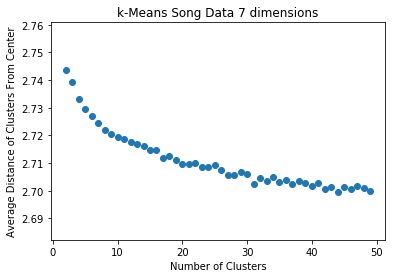

In [142]:
plt.scatter(x,y)
plt.title("k-Means Song Data 7 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

In [110]:
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=1)
transformed = ica.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 30):
    x.append(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transformed)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transformed)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


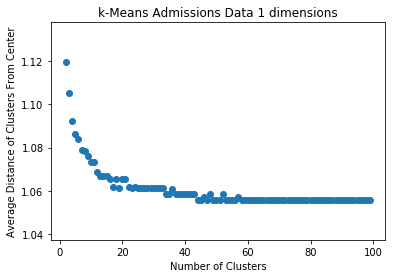

In [109]:
plt.scatter(x,y)
plt.title("k-Means Admissions Data 1 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

In [121]:
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=2)
transformed = ica.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 100):
    x.append(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transformed)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transformed)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


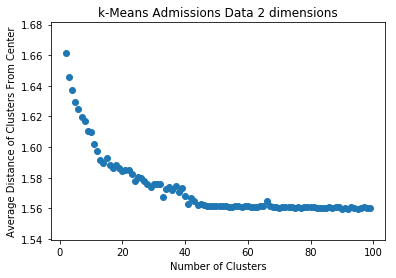

In [122]:
plt.scatter(x,y)
plt.title("k-Means Admissions Data 2 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

In [127]:
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=3)
transformed = ica.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 200):
    x.append(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transformed)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transformed)
    sum = 0
    print(i)
    for number in arr:
        sum += number
    y.append(sum/len(arr))

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


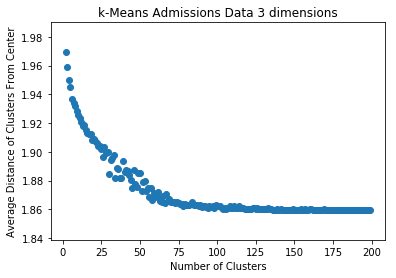

In [128]:
plt.scatter(x,y)
plt.title("k-Means Admissions Data 3 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


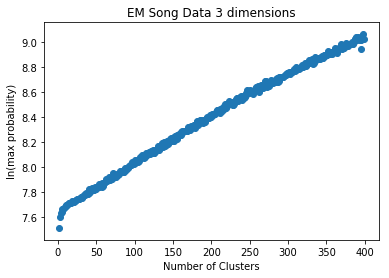

In [163]:
scaled_admissionsICA = preprocessing.scale(songData1)
ica = FastICA(n_components=3)
transformed = ica.fit_transform(scaled_admissionsICA)
from sklearn.mixture import GaussianMixture
x = []
y = []
for i in range(2, 400):
    x.append(i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(transformed)
    y.append(model2.score(transformed))
plt.scatter(x,y)
plt.title("EM Song Data 3 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("ln(max probability)")
plt.show()

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


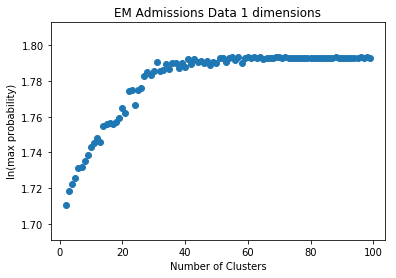

In [161]:
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=1)
transformed = ica.fit_transform(scaled_admissionsICA)
from sklearn.mixture import GaussianMixture
x = []
y = []
for i in range(2, 100):
    x.append(i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(transformed)
    y.append(model2.score(transformed))
plt.scatter(x,y)
plt.title("EM Admissions Data 1 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("ln(max probability)")
plt.show()

In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=1)
transformed = ica.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 1 dimension admissions data:" )
print(score)

For 1 dimension admissions data:
0.5066666666666667


/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=2)
transformed = ica.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 2 dimension admissions data:" )
print(score)

For 2 dimension admissions data:
0.49333333333333335


/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [167]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=3)
transformed = ica.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 3 dimension admissions data:" )
print(score)

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


For 3 dimension admissions data:
0.49333333333333335


In [170]:
scaled_admissionsICA = preprocessing.scale(songData1)
ica = FastICA(n_components=3)
transformed = ica.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 3 dimension song data:" )
print(score)

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


For 3 dimension song data:
0.5214521452145214


In [175]:
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=5)
transformed = ica.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 5 dimension admissions data:" )
print(score)

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 3
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


For 5 dimension admissions data:
0.49333333333333335


In [176]:
scaled_admissionsICA = preprocessing.scale(admissionsData1)
ica = FastICA(n_components=7)
transformed = ica.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 7 dimension admissions data:" )
print(score)

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 3
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


For 7 dimension admissions data:
0.5866666666666667


In [206]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
rp = SparseRandomProjection(n_components=1, random_state=2)
scaled_admissionsICA = preprocessing.scale(admissionsData1)
transform = rp.fit_transform(scaled_admissionsICA)


/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
x = []
y = []
for i in range (2, 100):
    x.append(i)
    #print(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transform)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transform)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))

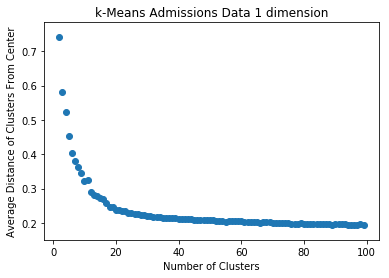

In [208]:
plt.scatter(x,y)
plt.title("k-Means Admissions Data 1 dimension")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


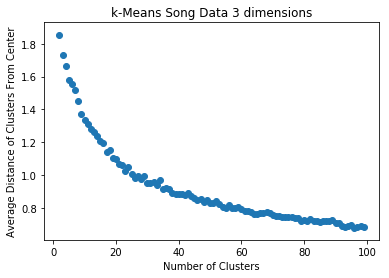

In [210]:
rp = SparseRandomProjection(n_components=3, random_state=2)
scaled_admissionsICA = preprocessing.scale(songData1)
transform = rp.fit_transform(scaled_admissionsICA)

x = []
y = []
for i in range (2, 100):
    x.append(i)
    #print(i)
    kmeans = KMeans(n_clusters = i)
    kmodel = kmeans.fit(transform)
    arr = getMeanSquaredDistances1(kmodel.cluster_centers_, transform)
    sum = 0
    for number in arr:
        sum += number
    y.append(sum/len(arr))
plt.scatter(x,y)
plt.title("k-Means Song Data 3 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance of Clusters From Center")
plt.show()

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


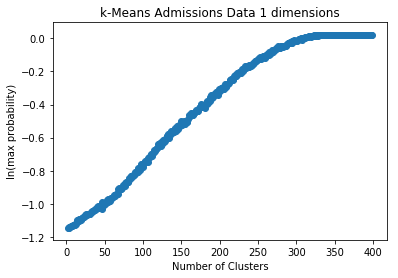

In [213]:
rp = SparseRandomProjection(n_components=1, random_state=2)
scaled_admissionsICA = preprocessing.scale(admissionsData1)
transform = rp.fit_transform(scaled_admissionsICA)
x = []
y = []
for i in range (2, 400):
    x.append(i)
    #print(i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(transform)
    y.append(model2.score(transform))
plt.scatter(x,y)
plt.title("k-Means Admissions Data 1 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("ln(max probability)")
plt.show()



/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


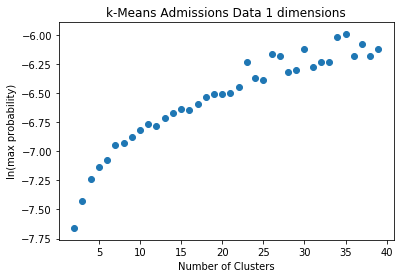

In [217]:
rp = SparseRandomProjection(n_components=7, random_state=2)
scaled_admissionsICA = preprocessing.scale(songData1)
transform = rp.fit_transform(scaled_admissionsICA)
x = []
y = []
for i in range (2, 40):
    x.append(i)
    print(i)
    model2 = GaussianMixture(n_components=i)
    model2.fit(transform)
    y.append(model2.score(transform))
plt.scatter(x,y)
plt.title("k-Means Admissions Data 1 dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("ln(max probability)")
plt.show()


In [220]:
scaled_admissionsICA = (admissionsData1)
rp = SparseRandomProjection(n_components=1, random_state=2)
transformed = rp.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 1 dimension admissions data:" )
print(score)

For 1 dimension admissions data:
0.5466666666666666


In [224]:
scaled_admissionsICA = (admissionsData1)
rp = SparseRandomProjection(n_components=2, random_state=2)
transformed = rp.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 2 dimension admissions data:" )
print(score)

For 2 dimension admissions data:
0.4533333333333333


In [225]:
scaled_admissionsICA = (admissionsData1)
rp = SparseRandomProjection(n_components=3, random_state=2)
transformed = rp.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetAdmissions, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 3 dimension admissions data:" )
print(score)

For 3 dimension admissions data:
0.5333333333333333


In [227]:
scaled_admissionsICA = (songData1)
rp = SparseRandomProjection(n_components=3, random_state=2)
transformed = rp.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 3 dimension song data:" )
print(score)

For 3 dimension song data:
0.45874587458745875


In [230]:
scaled_admissionsICA = (songData1)
rp = SparseRandomProjection(n_components=5, random_state=2)
transformed = rp.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 5 dimension song data:" )
print(score)

For 5 dimension song data:
0.49504950495049505


In [231]:
scaled_admissionsICA = (songData1)
rp = SparseRandomProjection(n_components=7, random_state=2)
transformed = rp.fit_transform(scaled_admissionsICA)

train, test = train_test_split(transformed, test_size=0.15)
targetAdmissionsTrain, targetAdmissionsTest = train_test_split(targetSong, test_size=0.15)
mlp0 = MLPClassifier(hidden_layer_sizes=6, random_state=5, max_iter = 500)
mlp0.fit(train, targetAdmissionsTrain)
score = mlp0.score(test, targetAdmissionsTest)
print("For 5 dimension song data:" )
print(score)

For 5 dimension song data:
0.47194719471947194
